
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Extended Data Figure 5
-----

In [1]:
import pandas as pd
import numpy as np

from scipy.spatial import distance

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

-----
##### Set up input / output directories

In [2]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [3]:
sys.path.append(str(root_dir))
import helper_functions.ml_utils as mu
import helper_functions.plotter as plotter

/Users/mehdi/Documents/py_envs/ms_codes/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-----
##### Load & prepare data 

In [4]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.tsv'), sep='\t', index_col=0)
low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

In [5]:
kzm611_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_signatures.tsv'), sep='\t', index_col=0)
kzm611_sigs_low = kzm611_sigs.loc[low_samples].copy()
kzm611_sigs.shape, kzm611_sigs_low.shape

((611, 69), (577, 69))

In [6]:
SBS288_novelSigs = pd.read_csv(os.path.join(root_dir, "source_data/SBS288_novelSigs.txt"), sep='\t', index_col=0)

SBS288_novelSigs['trinucs'] = [x[2:] for x in SBS288_novelSigs.index]
SBS96_novelSigs = SBS288_novelSigs.groupby(['trinucs']).sum()
SBS96_novelSigs.head(2)

,SBS288L1,SBS288L2,SBS288L3,SBS288L4,SBS288L5,SBS288H1,SBS288H2,SBS288H3,SBS288H4,SBS288H5
trinucs,,,,,,,,,,
A[C>A]A,0.021288,0.022425,0.003075,0.009064,0.006269,0.000008,0.000604,0.016663,0.004414,0.002145
A[C>A]C,0.000741,0.021694,0.001082,0.009632,0.035428,0.000262,0.000682,0.004052,0.001400,0.001638


In [7]:
id_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/ID83_novelSigs.txt'), sep='\t', index_col=0)
id_sigs.head(2)

,ID83L1,ID83I1,ID83I2,ID83I3,ID83I4,ID83H1,ID83H2,ID83H3,ID83H4,ID83H5
MutationsType,,,,,,,,,,
1:Del:C:0,0.023908,0.210011,0.002899,0.007928,0.002864,0.004141,0.032944,0.065992,0.029388,0.001441
1:Del:C:1,0.010363,0.016657,0.000000,0.001022,0.001406,0.001742,0.014681,0.001068,0.018625,0.000493


In [8]:
id_cos = pd.read_csv(os.path.join(root_dir, 'source_data/COSMIC_Sigs/COSMIC_v3.4_ID_GRCh37.txt'), sep='\t', index_col=0)
id_cos.head(2)

,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,ID10,...,ID14,ID15,ID16,ID17,ID18,ID19,ID20,ID21,ID22,ID23
Type,,,,,,,,,,,,,,,,,,,,,
1:Del:C:0,0.000160,0.004824,0.124727,0.007250,0.022202,0.030507,4.665610e-04,0.039828,0.334940,0.025105,...,0.012016,0.026527,9.527690e-04,0.006118,0.006012,0.054089,0.006578,0.001389,0.002570,0.051698
1:Del:C:1,0.000774,0.000022,0.208876,0.002735,0.028547,0.005492,1.000000e-18,0.023916,0.099994,0.029306,...,0.001946,0.121010,2.640000e-18,0.003668,0.002004,0.015009,0.003269,0.004837,0.001731,0.106194


In [9]:
id_comp = pd.DataFrame(np.zeros([id_sigs.shape[1], id_cos.shape[1]]),
                                index=id_sigs.columns.tolist(), columns=id_cos.columns.tolist())

for sig1 in id_sigs.columns.tolist():
    for sig2 in id_cos.columns.tolist():
        id_comp.loc[sig1][sig2] = 1-distance.cosine(id_sigs[sig1], id_cos[sig2])

#feat_kzmpog_comp_df = pd.DataFrame(feat_kzmpog_comp).T
id_compT = id_comp.T
id_comp.head()

,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,ID10,...,ID14,ID15,ID16,ID17,ID18,ID19,ID20,ID21,ID22,ID23
ID83L1,0.002000,0.005700,0.096053,0.104149,0.166115,0.410682,0.024506,0.357294,0.113592,0.286930,...,0.080408,0.063273,0.066553,0.158798,0.122591,0.605110,0.013229,0.116726,0.094500,0.152892
ID83I1,0.003476,0.009145,0.392234,0.207686,0.295014,0.098767,0.043590,0.230095,0.722537,0.266808,...,0.063150,0.105235,0.084615,0.160938,0.107303,0.490406,0.078934,0.164096,0.111641,0.387254
ID83I2,0.000523,0.000979,0.011209,0.010038,0.059242,0.098506,0.007856,0.234929,0.011695,0.203540,...,0.030495,0.006560,0.027389,0.096020,0.068813,0.906119,0.008149,0.039084,0.058370,0.032838
ID83I3,0.006559,0.003082,0.044779,0.058330,0.109943,0.050905,0.009941,0.053078,0.045995,0.258461,...,0.222652,0.016674,0.137361,0.234417,0.064839,0.933942,0.013375,0.059014,0.324606,0.078075
ID83I4,0.002760,0.003174,0.007160,0.009393,0.022096,0.357391,0.006276,0.127483,0.006051,0.142018,...,0.009857,0.003081,0.013039,0.041290,0.016905,0.054804,0.001867,0.022090,0.008318,0.016595


In [10]:
Pich_SP_sbs = pd.read_csv(os.path.join(root_dir, 'source_data/Pich_data/SigProfiler.snvs.tsv'), sep="\t", index_col=0)
Pich_SP_sbs.head(2)

,1_SBS31_0.968153_0.98,2_SBS44_0.63,3_0.96,4_SBS11_0.985989_0.97,5_0.92,6_SBS17b_0.879886_0.93,7_SBS36_0.979943_0.84,8_SBS2_0.999321_1.0,9_0.97,10_0.94,...,16_0.92,17_SBS4_0.935484_0.97,18_SBS15_0.917425_0.87,19_SBS17b_0.961548_0.99,20_0.92,21_SBS29_0.27,22_SBS14_0.77,23_SBS1_0.996494_1.0,24_0.96,25_SBS13_-0.5
A[C>A]A,0.000570,0.002448,0.020698,0.000022,0.003007,0.001715,0.061274,0.000137,0.000273,0.013139,...,0.000838,0.061025,0.000238,0.000252,0.024640,0.071257,0.001062,0.002367,0.012179,0.007481
A[C>A]C,0.036481,0.006777,0.028588,0.000049,0.000106,0.000142,0.010175,0.000842,0.000348,0.000162,...,0.000297,0.037160,0.000175,0.000049,0.050449,0.022928,0.007116,0.003483,0.000387,0.011159


In [11]:
Pich_SA_sbs = pd.read_csv(os.path.join(root_dir, 'source_data/Pich_data/SignatureAnalyzer.snvs.tsv'), sep="\t", index_col=0)
Pich_SA_sbs.head(2)

,1_1,2_1,3_SBS12_0.915572_1,4_1,5_1,6_SBS4_0.961549_1,7_1,8_SBS20_0.930799_1,9_1,10_1,...,64_1,65_SBS44_0.903138_1,66_SBS7b_0.984914_1,67_1,68_1,69_1,70_1,71_SBS44_0.865933_1,72_SBS55_0.987381_1,73_1
A[C>A]A,0.003916,0.000956,0.000980,0.013249,0.005760,0.061912,0.001540,0.000925,0.004524,0.018942,...,0.000252,0.000795,0.004900,0.002320,0.000869,0.005480,0.004848,0.001027,0.006490,0.000916
A[C>A]C,0.002219,0.299153,0.001154,0.009886,0.004538,0.027182,0.000745,0.007159,0.001736,0.006963,...,0.000204,0.000910,0.000264,0.001879,0.000950,0.002806,0.001031,0.007718,0.001817,0.002840


In [12]:
KZM611_Pich_SP_comp = pd.DataFrame(np.zeros([SBS96_novelSigs.shape[1], Pich_SP_sbs.shape[1]]),
                                index=SBS96_novelSigs.columns.tolist(), columns=Pich_SP_sbs.columns.tolist())

for sig1 in SBS96_novelSigs.columns.tolist():
    for sig2 in Pich_SP_sbs.columns.tolist():
        KZM611_Pich_SP_comp.loc[sig1][sig2] = 1-distance.cosine(SBS96_novelSigs[sig1], Pich_SP_sbs[sig2])

#feat_kzmpog_comp_df = pd.DataFrame(feat_kzmpog_comp).T
KZM611_Pich_SP_compT = KZM611_Pich_SP_comp.T
KZM611_Pich_SP_comp.head()

,1_SBS31_0.968153_0.98,2_SBS44_0.63,3_0.96,4_SBS11_0.985989_0.97,5_0.92,6_SBS17b_0.879886_0.93,7_SBS36_0.979943_0.84,8_SBS2_0.999321_1.0,9_0.97,10_0.94,...,16_0.92,17_SBS4_0.935484_0.97,18_SBS15_0.917425_0.87,19_SBS17b_0.961548_0.99,20_0.92,21_SBS29_0.27,22_SBS14_0.77,23_SBS1_0.996494_1.0,24_0.96,25_SBS13_-0.5
SBS288L1,0.244184,0.624099,0.564755,0.372726,0.638047,0.221511,0.118951,0.179037,0.342516,0.509543,...,0.193377,0.293900,0.291551,0.069689,0.383744,0.434439,0.279079,0.230599,0.701273,0.341383
SBS288L2,0.347333,0.774344,0.287086,0.599044,0.396965,0.093892,0.236535,0.220664,0.264564,0.213284,...,0.081399,0.455630,0.587775,0.047936,0.420521,0.438442,0.444410,0.118358,0.372696,0.266667
SBS288L3,0.076250,0.146142,0.502248,0.064154,0.515571,0.126305,0.036825,0.028140,0.562726,0.300075,...,0.089225,0.090999,0.122216,0.060986,0.167701,0.172139,0.268805,0.055354,0.667788,0.168697
SBS288L4,0.169962,0.169874,0.584708,0.098975,0.421170,0.212064,0.160789,0.064063,0.182627,0.609663,...,0.761628,0.245501,0.151182,0.112398,0.405459,0.317736,0.229018,0.026180,0.498940,0.286317
SBS288L5,0.449009,0.378984,0.196184,0.143928,0.381051,0.171762,0.184446,0.059166,0.208996,0.217978,...,0.266166,0.580342,0.176492,0.084229,0.822522,0.349770,0.368220,0.041437,0.242500,0.228308


In [13]:
KZM611_Pich_SA_comp = pd.DataFrame(np.zeros([SBS96_novelSigs.shape[1], Pich_SA_sbs.shape[1]]),
                                index=SBS96_novelSigs.columns.tolist(), columns=Pich_SA_sbs.columns.tolist())

for sig1 in SBS96_novelSigs.columns.tolist():
    for sig2 in Pich_SA_sbs.columns.tolist():
        KZM611_Pich_SA_comp.loc[sig1][sig2] = 1-distance.cosine(SBS96_novelSigs[sig1], Pich_SA_sbs[sig2])

KZM611_Pich_SA_compT = KZM611_Pich_SA_comp.T
KZM611_Pich_SA_comp.head()

,1_1,2_1,3_SBS12_0.915572_1,4_1,5_1,6_SBS4_0.961549_1,7_1,8_SBS20_0.930799_1,9_1,10_1,...,64_1,65_SBS44_0.903138_1,66_SBS7b_0.984914_1,67_1,68_1,69_1,70_1,71_SBS44_0.865933_1,72_SBS55_0.987381_1,73_1
SBS288L1,0.540186,0.087641,0.566151,0.536881,0.567304,0.410862,0.210017,0.079090,0.240910,0.664989,...,0.426661,0.585323,0.253052,0.690480,0.340530,0.227114,0.338822,0.640904,0.119949,0.237722
SBS288L2,0.567951,0.254724,0.264289,0.450034,0.859774,0.551622,0.087654,0.254085,0.276351,0.483766,...,0.541312,0.624732,0.327671,0.597290,0.276145,0.231461,0.321674,0.818553,0.076524,0.214423
SBS288L3,0.109164,0.043522,0.899673,0.262189,0.251427,0.169386,0.103623,0.026637,0.063351,0.406232,...,0.067390,0.317884,0.064909,0.482086,0.559774,0.238003,0.097841,0.180687,0.025703,0.169881
SBS288L4,0.129469,0.109214,0.417371,0.512376,0.251943,0.345295,0.782815,0.059191,0.153057,0.479777,...,0.078632,0.270794,0.110227,0.410526,0.213869,0.204885,0.232913,0.209315,0.048873,0.229611
SBS288L5,0.169102,0.357426,0.212572,0.313437,0.258697,0.561191,0.273841,0.472637,0.136710,0.343909,...,0.136333,0.383248,0.136356,0.383117,0.204651,0.102739,0.200952,0.408255,0.072506,0.107376


In [14]:
KZM611_Pich_comp_hc = KZM611_Pich_SA_comp.copy()
KZM611_Pich_comp_hc[KZM611_Pich_comp_hc<0.6] = 0
KZM611_Pich_comp_hc = KZM611_Pich_comp_hc.loc[(KZM611_Pich_comp_hc.sum(axis=1) != 0), (KZM611_Pich_comp_hc.sum(axis=0) != 0)]
KZM611_Pich_comp_hc.shape, KZM611_Pich_comp_hc.shape

((10, 35), (10, 35))

In [15]:
KZM611_Pich_comp_hc2plt = KZM611_Pich_SA_comp.loc[KZM611_Pich_comp_hc.index, KZM611_Pich_comp_hc.columns].copy()

-----
## Panel a

Text(0.01, 0.35, 'Novel SBS Signatures')

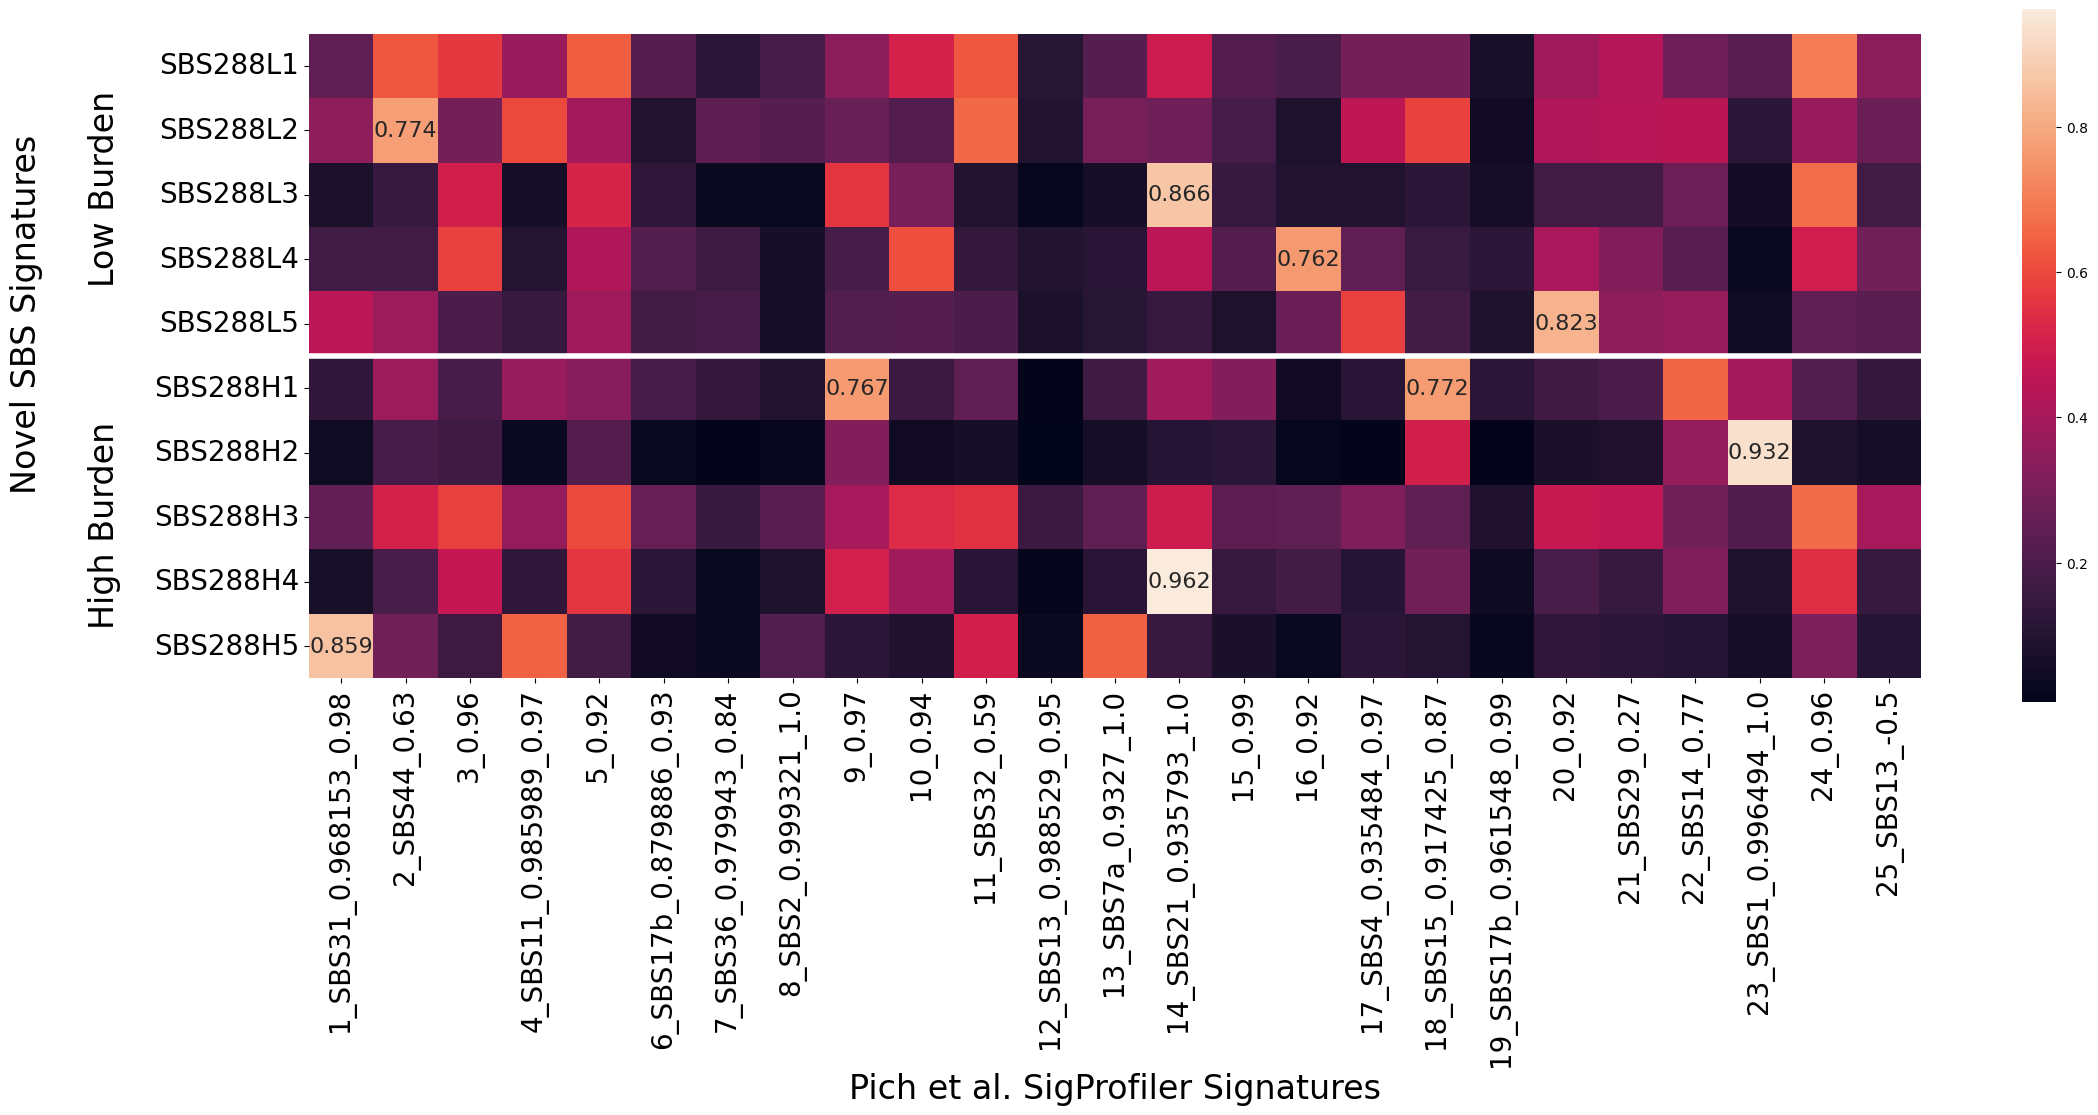

In [16]:
f, axes = plt.subplots(figsize=(26, 9))

'''annot_labels = np.empty_like(KZM611_Pich_SP_comp)
annot_mask = KZM611_Pich_SP_comp <0.75
annot_labels[annot_mask] = np.nan'''


ax1 = sns.heatmap(KZM611_Pich_SP_comp, square=True, annot=True, fmt='0.3g', cbar=True, annot_kws={"size": 16})
ax1.tick_params(axis='both', which='major', labelrotation=90, labelsize=14)
ax1.tick_params(axis='y', which='major', labelrotation=0)

for t in ax1.texts:
    if float(t.get_text())>=0.75:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text
        
min_x, max_x = ax1.get_xlim()
ax1.hlines([5], *(min_x, max_x), 'white', lw=4)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=20)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=20)
plt.xlabel('Pich et al. SigProfiler Signatures', fontsize=24)

plt.gcf().text(0.04, 0.58, 'Low Burden', rotation=90, fontsize=24)
plt.gcf().text(0.04, 0.2, 'High Burden', rotation=90, fontsize=24)
plt.gcf().text(0.01, 0.35, 'Novel SBS Signatures', rotation=90, fontsize=24)

plt.savefig(os.path.join(fig_out, 'ExFig_5a.pdf'), bbox_inches="tight")

-----
## Panel b

Text(0.01, 0.3, 'Novel SBS Signatures')

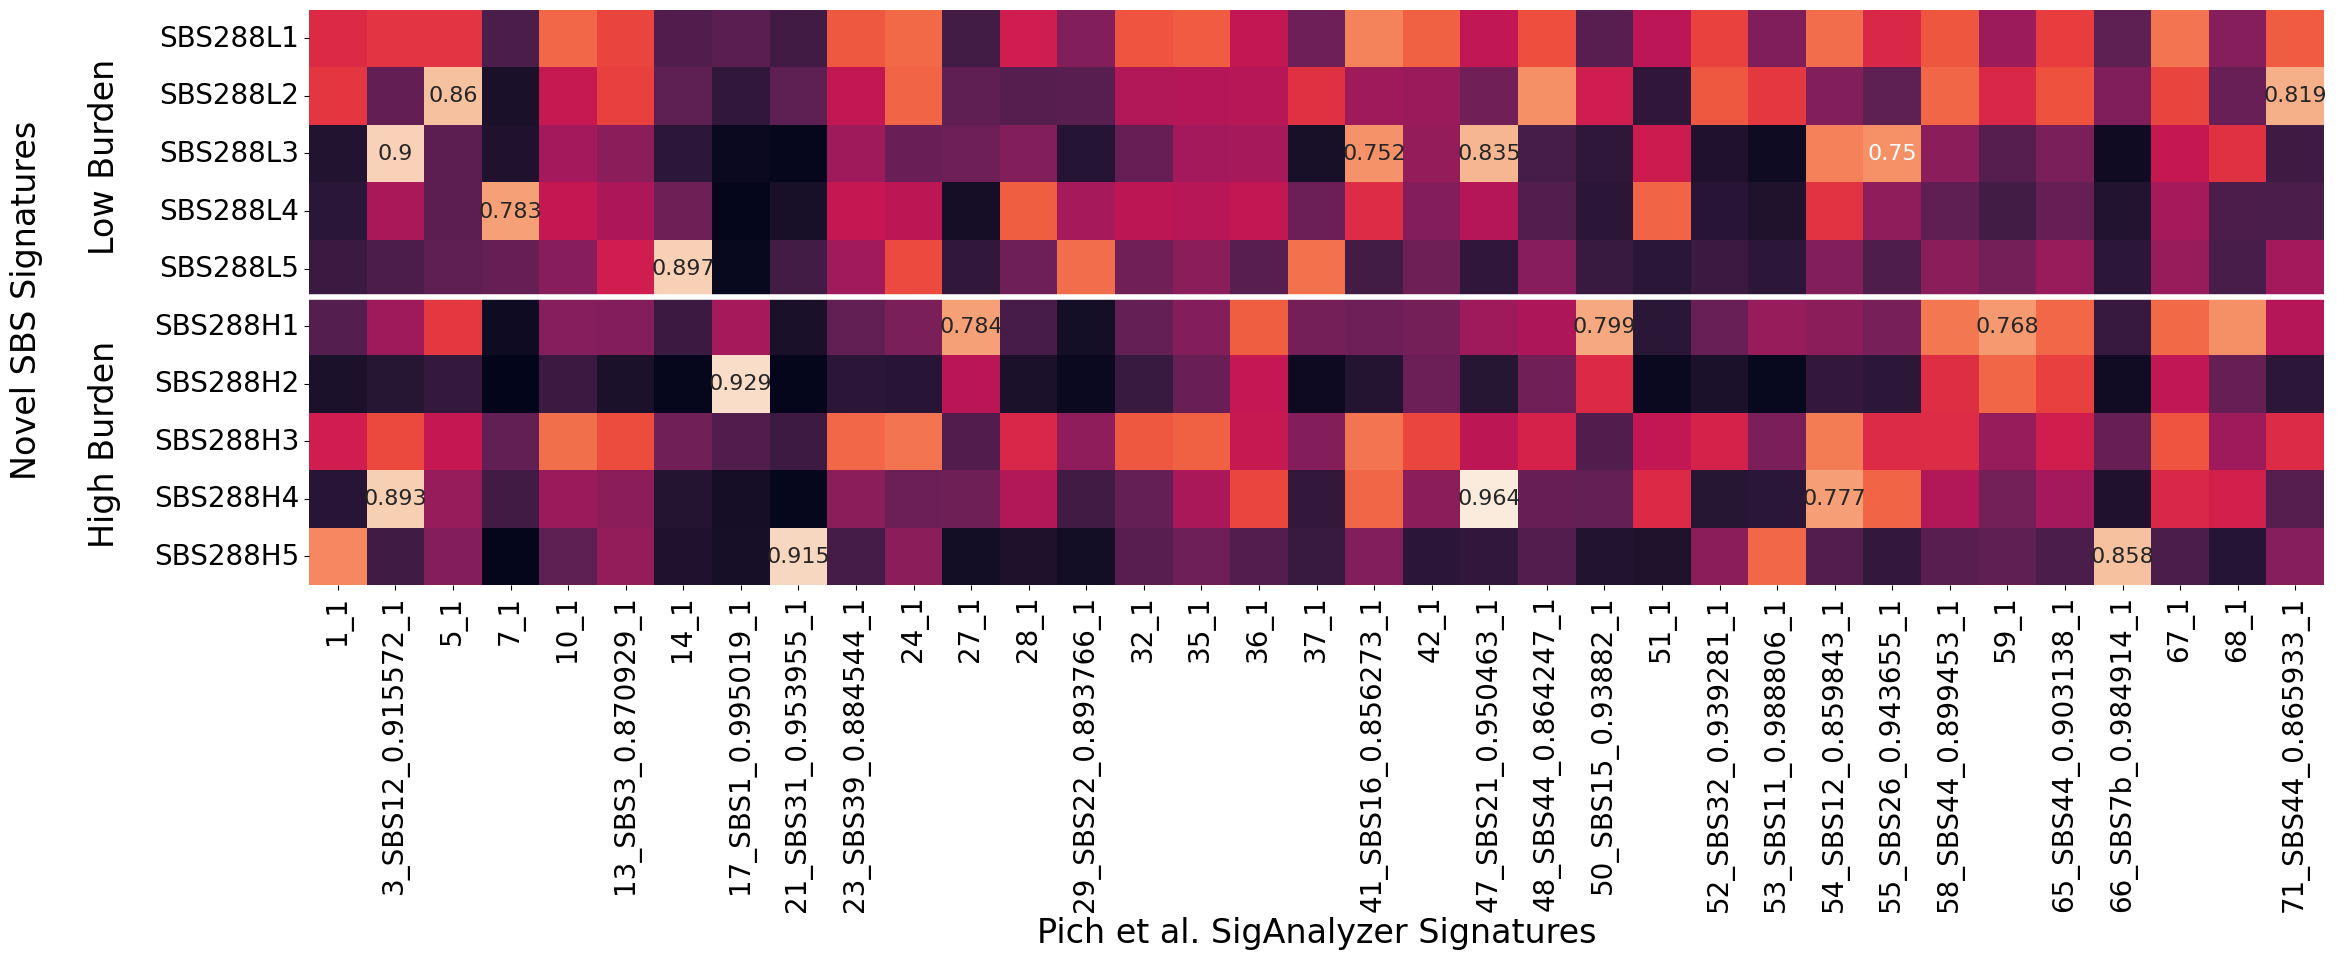

In [17]:
f, axes = plt.subplots(figsize=(26, 9))
ax2 = sns.heatmap(KZM611_Pich_comp_hc2plt, square=True, annot=True, fmt='0.3g', cbar=False, annot_kws={"size": 16})
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='y', which='major', labelrotation=0)

for t in ax2.texts:
    if float(t.get_text())>=0.75:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

min_x, max_x = ax2.get_xlim()
ax2.hlines([5], *(min_x, max_x), 'white', lw=4)

ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=20)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=20)
plt.xlabel('Pich et al. SigAnalyzer Signatures', fontsize=24)

plt.gcf().text(0.04, 0.55, 'Low Burden', rotation=90, fontsize=24)
plt.gcf().text(0.04, 0.225, 'High Burden', rotation=90, fontsize=24)
plt.gcf().text(0.01, 0.3, 'Novel SBS Signatures', rotation=90, fontsize=24)

plt.savefig(os.path.join(fig_out, 'ExFig_5b.pdf'), bbox_inches="tight")

-----
## Panel c

In [20]:
mutations = plotter.get_mut_dict(SBS96_novelSigs.T)
sample1 = mutations['SBS288L5']

mutations_P = plotter.get_mut_dict(Pich_SA_sbs.T)
sample_P = mutations_P['14_1']

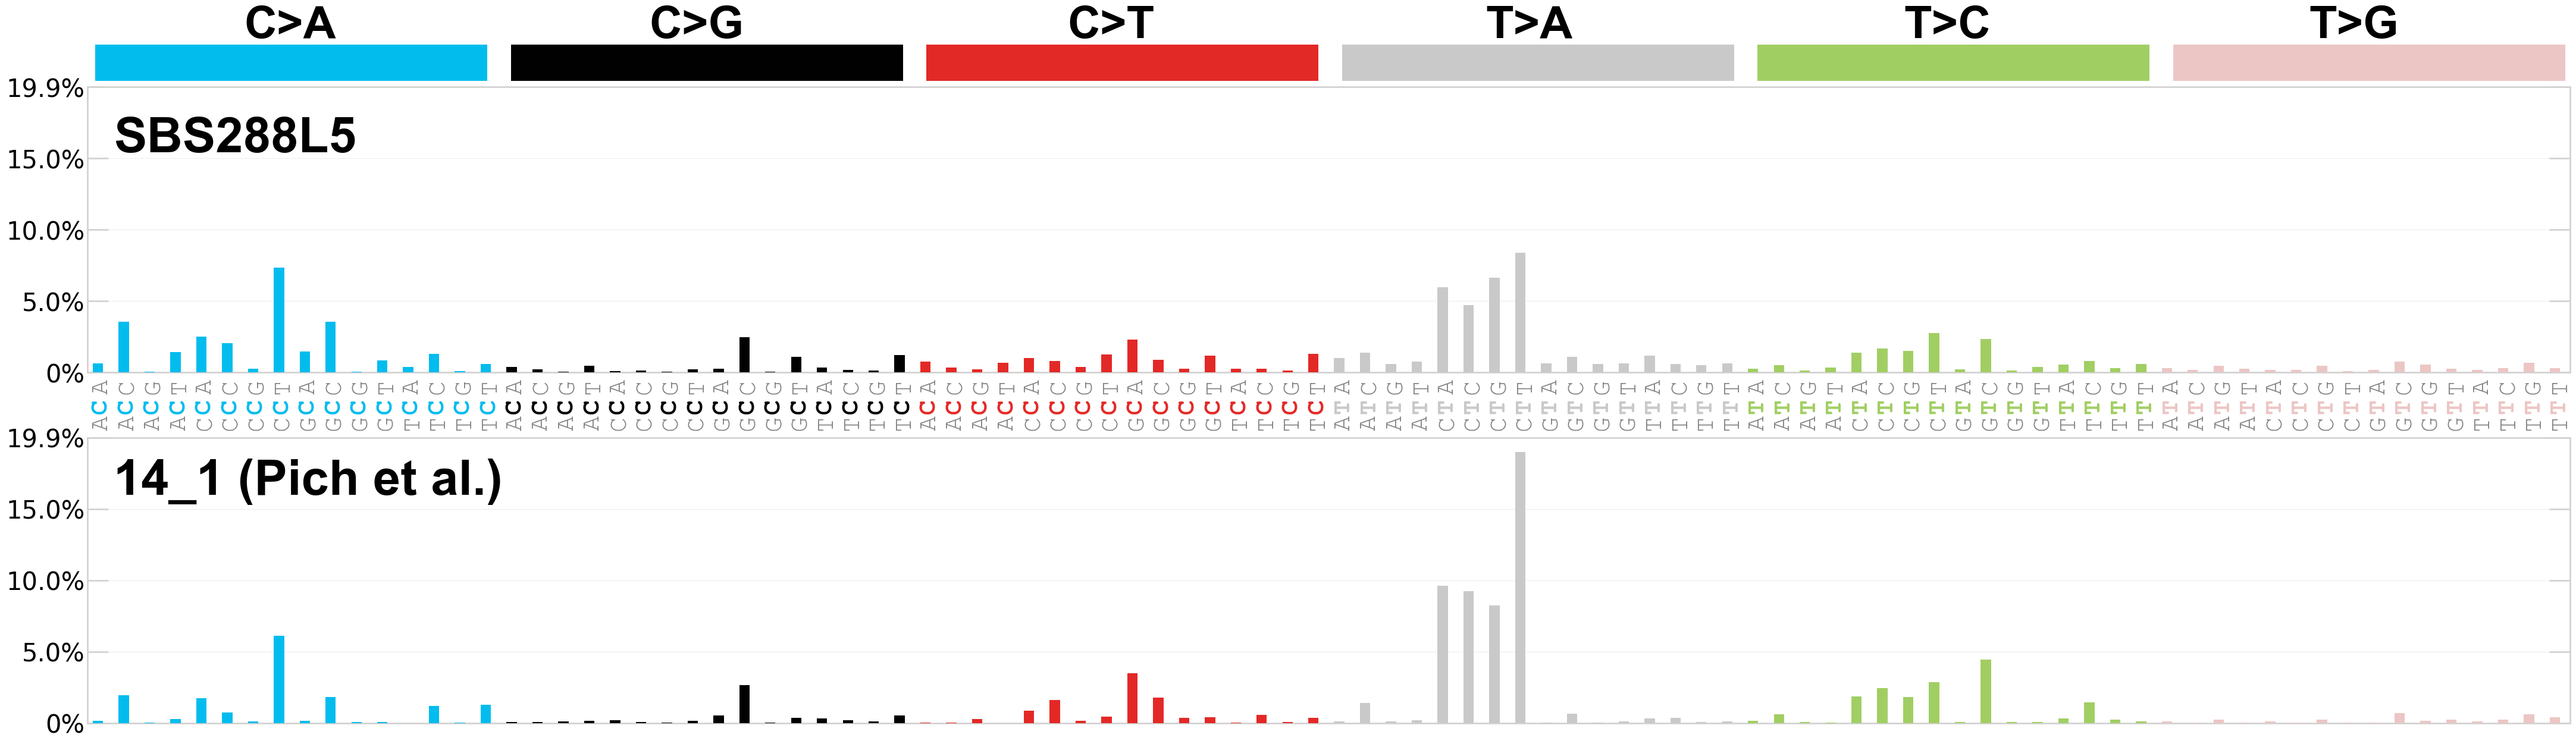

In [ ]:

ymax = max(SBS96_novelSigs['SBS288L5'].max(), Pich_SA_sbs['14_1'].max()) + 0.01

## mu.plot_profile_diff
plotter.plot_profile_diff(sample1, sample_P, 'SBS288L5', '14_1 (Pich et al.)',  ymax)
plt.savefig(os.path.join(fig_out, 'ExFig_5c.pdf'), bbox_inches="tight")